xvector_dvector_inspection 
------------------------

sub utterance끼리는 어떻게 보이나?


### Environment

In [1]:
%load_ext autoreload
%autoreload 2
%pylab
%matplotlib inline
    
import pandas as pd
import pickle
import numpy as np
import sys
import os


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.append('/host/projects/sv_experiments/')
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [3]:
def key2df(keys, delimeter="-"):
    key_df = pd.DataFrame(keys, columns=['key'])
    key_df['spk'] = key_df.key.apply(lambda x: x.split(delimeter)[0])
    key_df['label'] = key_df.groupby('spk').ngroup()
    key_df['origin'] = key_df.spk.apply(lambda x: 'voxc2' if x.startswith('id') else 'voxc1')
    
    return key_df

In [57]:
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.cm as cm

def run_tsne(sv_key_df, sv_embeds, title, n_class = 40):
    sv_all_spks = sv_key_df.spk.unique().tolist()
    
    tsne_spks = np.random.choice(sv_all_spks, size=n_class, replace=False)
    spk2label = {k:i for i, k in enumerate(tsne_spks)}

    tsne_df = sv_key_df[sv_key_df.spk.isin(tsne_spks)]
    tsne_embeds = sv_embeds[tsne_df.index]
    X_embedded = TSNE(n_components=2).fit_transform(tsne_embeds)
    
    colors = cm.rainbow_r(np.linspace(0, 1, n_class))
    c_label = tsne_df.spk.apply(lambda x: tsne_spks.tolist().index(x))

    fig = plt.figure(figsize=(10,10))
    for spk in tsne_spks:
        X = X_embedded[tsne_df[tsne_df.spk == spk].index]
        plt.scatter(X[:,0], X[:,1], c=colors[tsne_spks.tolist().index(spk)] )
    plt.legend(['s{}'.format(i) for i in range(len(tsne_spks))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
    plt.title(title)
    
    return fig

## TSNE

### Pytorch voxc1 x-vector 800f

In [58]:
sv_keys = pickle.load(open("../../sv_system/voxc1_mfcc30_best/sv_keys.pkl", "rb"))
sv_embeds = np.load("../../sv_system/voxc1_mfcc30_best/sv_embeds.npy")

In [59]:
sv_key_df = key2df(sv_keys, delimeter='-')

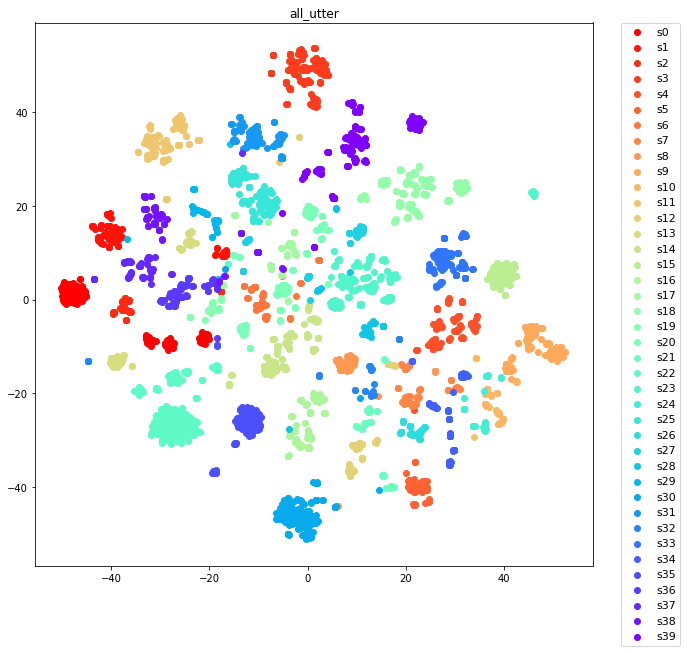

In [60]:
fig = run_tsne(sv_key_df, sv_embeds, "all_utter", n_class = 40)

### Pytorch voxc1 x-vector  100f

In [49]:
sv_keys = pickle.load(open("../../sv_system/voxc1_mfcc30_best_100f/sv_keys.pkl", "rb"))
sv_embeds = np.load("../../sv_system/voxc1_mfcc30_best_100f/sv_embeds.npy")

In [50]:
sv_key_df = key2df(sv_keys, delimeter='-')

In [ ]:
run_tsne(sv_key_df, sv_embeds, "all_utter", n_class = 40)

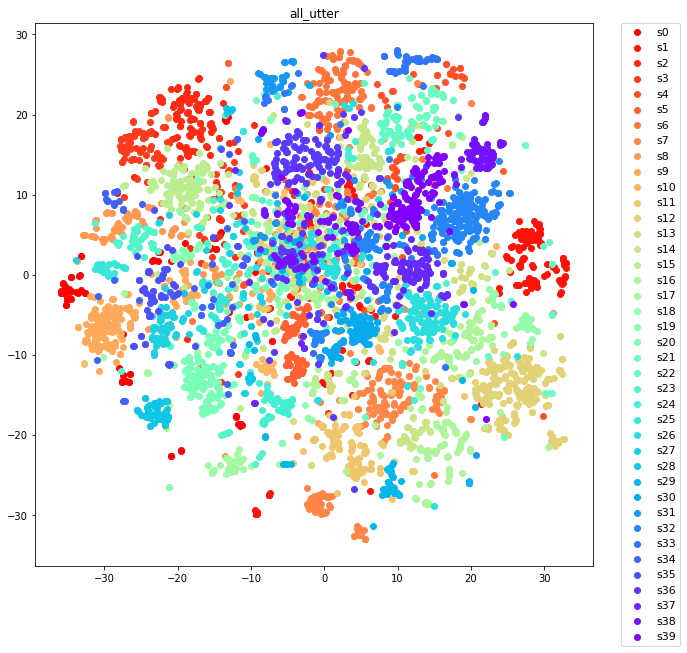

In [52]:
Out[51]

### Pytorch voxc1 x-vector  200f

In [22]:
sv_keys = pickle.load(open("../../sv_system/voxc1_mfcc30_sub_utter_200f/sv_keys.pkl", "rb"))
sv_embeds = np.load("../../sv_system/voxc1_mfcc30_sub_utter_200f/sv_embeds.npy")

In [23]:
sv_embeds.shape

(4874, 2, 512)

In [24]:
sv_key_df = key2df(sv_keys, delimeter='-')

In [35]:
n_class = 40

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.cm as cm

sv_all_spks = sv_key_df.spk.unique().tolist()

tsne_spks = np.random.choice(sv_all_spks, size=n_class, replace=False)
spk2label = {k:i for i, k in enumerate(tsne_spks)}

tsne_df = sv_key_df[sv_key_df.spk.isin(tsne_spks)]
tsne_embeds = sv_embeds[tsne_df.index]
X_embedded = TSNE(n_components=2).fit_transform(tsne_embeds.reshape(-1, 512))

X_embedded = X_embedded.reshape(-1, sv_embeds.size(1), 2)

Text(0.5,1,'<function title at 0x7f76d15da400>')

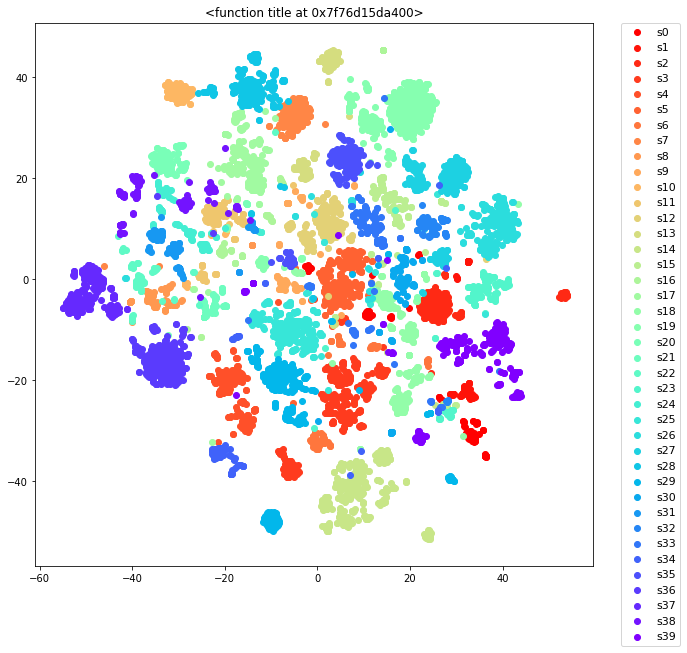

In [41]:
colors = cm.rainbow_r(np.linspace(0, 1, n_class))
c_label = tsne_df.spk.apply(lambda x: tsne_spks.tolist().index(x))

fig = plt.figure(figsize=(10,10))
for spk in tsne_spks:
    X = X_embedded[tsne_df[tsne_df.spk == spk].index]
    X = X.reshape(-1, 2)
    plt.scatter(X[:,0], X[:,1], c=colors[tsne_spks.tolist().index(spk)] )
plt.legend(['s{}'.format(i) for i in range(len(tsne_spks))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
plt.title(title)